In [116]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.tensorboard import SummaryWriter
from torchvision import models
from torchsummary import summary

In [117]:
torch.cuda.is_available()

True

In [118]:
model = torch.load('model.pt')
model = model.cuda()

In [119]:
input_path = "Keras_Data"
train_path = os.path.join(input_path, "train")
train_list_cat = os.listdir(os.path.join(train_path, "Cat"))
train_list_dog = os.listdir(os.path.join(train_path, "Dog"))
train_data_num = len(train_list_cat)

In [120]:
valid_path = os.path.join(input_path, "valid")
valid_list_cat = os.listdir(os.path.join(valid_path, "Cat"))
valid_list_dog = os.listdir(os.path.join(valid_path, "Dog"))
valid_data_num = len(valid_list_cat)

In [121]:
epochs = 10
batch_size = 32
criterion = nn.CrossEntropyLoss()
lr = 0.001
opt = optim.SGD(model.parameters(), lr = lr, momentum=0.9)
p = 0.5

In [122]:
epoch_loss = []
epoch_acc_train = []
epoch_acc_valid = []
writer = SummaryWriter()
iter = 1
for epoch in range(epochs):
    print("Epoch:", epoch)
    running_loss = []
    running_accuracy_train = []
    running_accuracy_valid = []
    train_num = 0
    train_acc_num = 0
    valid_num = 0
    valid_acc_num = 0
    #trainning
    np.random.shuffle(train_list_cat)
    np.random.shuffle(train_list_dog)
    for batch in range(train_data_num//batch_size):
        if batch%10==0:
            print("Batch:", batch)
        input_imgs = []
        targets = []
        #make trainning data _BEGIN_
        for i in range(batch_size):
            img = cv2.imread(os.path.join(train_path, "Cat", train_list_cat[batch*batch_size+i]))
            if img is not None:
                img = cv2.resize(img, (224, 224))
                
                input_imgs.append(img)
                targets.append(1)
            img = cv2.imread(os.path.join(train_path, "Dog", train_list_dog[batch*batch_size+i]))
            if img is not None:
                img = cv2.resize(img, (224, 224))
                input_imgs.append(img)
                targets.append(0)
        input_imgs = np.array(input_imgs, dtype=np.float32)
        targets = np.array(targets, dtype=np.longlong)
        input_imgs = torch.from_numpy(input_imgs).cuda()
        targets = torch.from_numpy(targets).cuda()
        
        input_imgs = input_imgs.permute(0, 3, 1, 2)
        targets = targets
        #make trainning data _END_
        #trainning _BEGIN_
        opt.zero_grad()
        outputs = model(input_imgs)
        loss = criterion(outputs, targets)
        loss.backward()
        opt.step()
        
        #trainning _END_
        #predict _BEGIN_
        with torch.no_grad():
            #predict trainning
            outputs = torch.sigmoid(outputs)
            _, predicted = torch.max(outputs.data, 1)
            train_num += (predicted == targets).sum().item()
            train_acc_num += predicted.size(0)
            #predict validation
            input_imgs = []
            targets = []
            for i in range(batch_size//8):
                img = cv2.imread(os.path.join(valid_path, "Cat", valid_list_cat[batch*batch_size//8+i]))
                if img is not None:
                    img = cv2.resize(img, (224, 224))
                    input_imgs.append(img)
                    targets.append(1)
                    if np.random.rand() > p:
                        img = cv2.flip(img, 1)
                        input_imgs.append(img)
                        targets.append(1)
                img = cv2.imread(os.path.join(valid_path, "Dog", valid_list_dog[batch*batch_size//8+i]))
                if img is not None:                    
                    img = cv2.resize(img, (224, 224))
                    input_imgs.append(img)
                    targets.append(0)
                    if np.random.rand() > p:
                        img = cv2.flip(img, 1)
                        input_imgs.append(img)
                        targets.append(0)
            input_imgs = np.array(input_imgs, dtype=np.float32)
            targets = np.array(targets, dtype=np.longlong)
            input_imgs = torch.from_numpy(input_imgs).cuda()
            targets = torch.from_numpy(targets).cuda()

            input_imgs = input_imgs.permute(0, 3, 1, 2)
            targets = targets
            outputs = model(input_imgs)
            outputs = torch.sigmoid(outputs)
            _, predicted = torch.max(outputs.data, 1)
            valid_num += (predicted == targets).sum().item()
            valid_acc_num += predicted.size(0)
        
        running_loss.append(loss.item())
        running_accuracy_train.append(train_num/train_acc_num)
        running_accuracy_valid.append(valid_num/valid_acc_num)
        writer.add_scalar("Loss/train", loss.item(), iter)
        writer.add_scalar("Accuracy/train", train_num/train_acc_num, iter)
        writer.add_scalar("Accuracy/valid", valid_num/valid_acc_num, iter)
        iter += 1
print("Done with", iter - 1, "iterations!")
writer.flush()
writer.close()
torch.save(model, "trained_No_pre_filp.pt")


Epoch: 0
Batch: 0
Batch: 10
Batch: 20
Batch: 30
Batch: 40
Batch: 50
Batch: 60
Batch: 70
Batch: 80
Batch: 90
Batch: 100
Batch: 110
Batch: 120
Batch: 130
Batch: 140
Batch: 150
Batch: 160
Batch: 170
Batch: 180
Batch: 190
Batch: 200
Batch: 210
Batch: 220
Batch: 230
Batch: 240
Batch: 250
Batch: 260
Batch: 270
Batch: 280
Batch: 290
Batch: 300
Batch: 310
Epoch: 1
Batch: 0
Batch: 10
Batch: 20
Batch: 30
Batch: 40
Batch: 50
Batch: 60
Batch: 70
Batch: 80
Batch: 90
Batch: 100
Batch: 110
Batch: 120
Batch: 130
Batch: 140
Batch: 150
Batch: 160
Batch: 170
Batch: 180
Batch: 190
Batch: 200
Batch: 210
Batch: 220
Batch: 230
Batch: 240
Batch: 250
Batch: 260
Batch: 270
Batch: 280
Batch: 290
Batch: 300
Batch: 310
Epoch: 2
Batch: 0
Batch: 10
Batch: 20
Batch: 30
Batch: 40
Batch: 50
Batch: 60
Batch: 70
Batch: 80
Batch: 90
Batch: 100
Batch: 110
Batch: 120
Batch: 130
Batch: 140
Batch: 150
Batch: 160
Batch: 170
Batch: 180
Batch: 190
Batch: 200
Batch: 210
Batch: 220
Batch: 230
Batch: 240
Batch: 250
Batch: 260
Batch

In [107]:
np.random.rand()

0.90856263085075

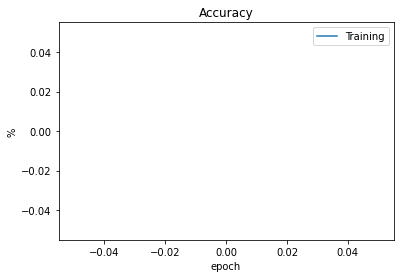

In [98]:
l = np.arange(0, len(running_loss))
plt.plot(l, running_loss, label="Training")
plt.title("Accuracy")
plt.xlabel("epoch")
plt.ylabel("%")
plt.legend()
plt.savefig("Accuracy")

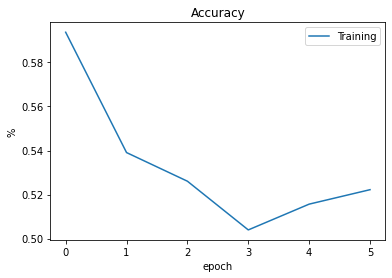

In [13]:
l = np.arange(0, len(running_accuracy_train))
plt.plot(l, running_accuracy_train, label="Training")
plt.title("Accuracy")
plt.xlabel("epoch")
plt.ylabel("%")
plt.legend()
plt.savefig("Accuracy")

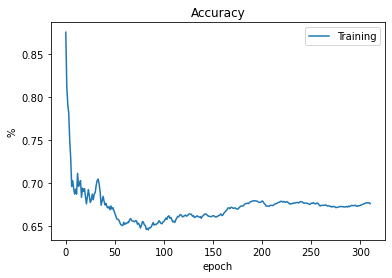

In [ ]:
l = np.arange(0, len(running_accuracy_valid))
plt.plot(l, running_accuracy_valid, label="Training")
plt.title("Accuracy")
plt.xlabel("epoch")
plt.ylabel("%")
plt.legend()
plt.savefig("Accuracy")

In [7]:
train_list_dog

In [54]:
running_accuracy_valid

[0.484375, 0.4921875, 0.5052083333333334, 0.5058823529411764]

In [55]:
running_accuracy_train

[0.5, 0.4921875, 0.4947916666666667, 0.48828125]